### Installing OSMnx in Windows using Anaconda 
Source: https://joshkobeng.medium.com/installing-osmnx-on-windows-cc96a3b432ea
<br>
*Note: Anaconda must be updated.*
1. Anaconda Prompt -> 'conda config — prepend channels conda-forge'
2. -> 'conda create -n ox — strict-channel-priority osmnx' -> 'y'

##### To see if the installation worked:
1. Anaconda Navigator -> Applications on -> see "ox" installed
2. -> click 'ox'

##### Then install the Jupyter Notebook.

#### Test Run 
Source: https://jupyter.org/try-jupyter/retro/notebooks/?path=notebooks/Intro.ipynb

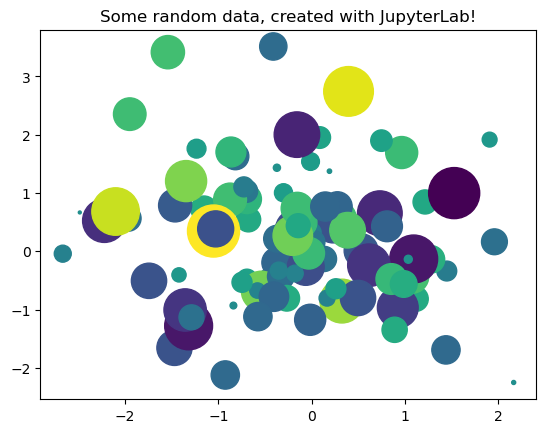

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Generate 100 random data points along 3 dimensions
x, y, scale = np.random.randn(3, 100)
fig, ax = plt.subplots()

# Map each onto a scatterplot we'll create with Matplotlib
ax.scatter(x=x, y=y, c=scale, s=np.abs(scale)*500)
ax.set(title="Some random data, created with JupyterLab!")
plt.show()

#### Test Run 
Source: https://github.com/gboeing/osmnx-examples/blob/main/notebooks/00-osmnx-features-demo.ipynb

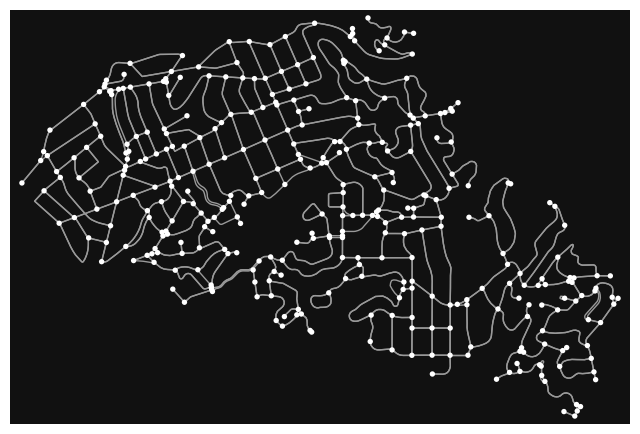

In [1]:
import networkx as nx
import osmnx as ox

ox.__version__

# download/model a street network for some city then visualize it
G = ox.graph_from_place("Piedmont, California, USA", network_type="drive")
fig, ax = ox.plot_graph(G)

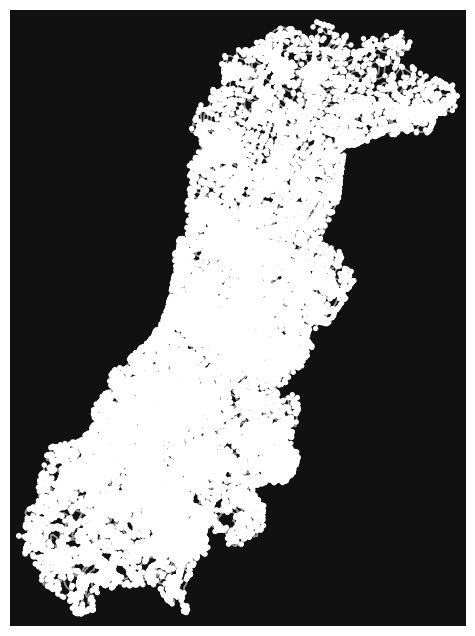

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
import osmnx as ox
ox.plot_graph(ox.graph_from_place('Modena, Italy'))

#### My Test Run 


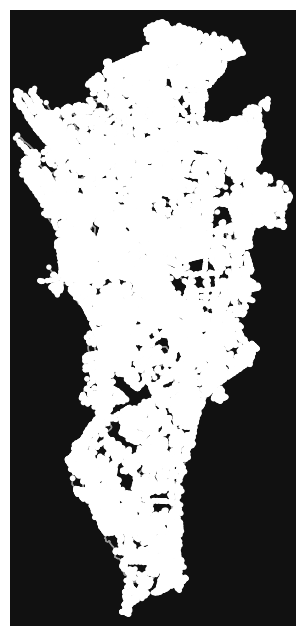

In [3]:
H = ox.graph_from_place("Metro Manila, Philippines", network_type="drive")
fig, ax = ox.plot_graph(H)

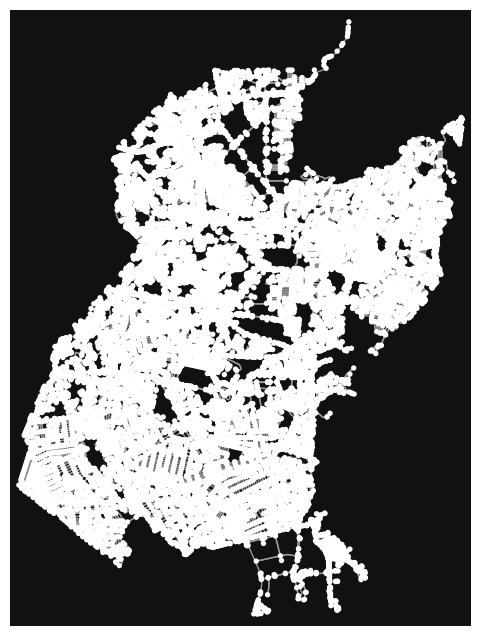

In [17]:
import osmnx as ox
ox.__version__

H = ox.graph.graph_from_place("Quezon City,Metro Manila, Philippines", network_type="drive_service", simplify=True, retain_all=False, truncate_by_edge=False, which_result=None, buffer_dist=None, clean_periphery=None, custom_filter=None)
fig, ax = ox.plot_graph(H)

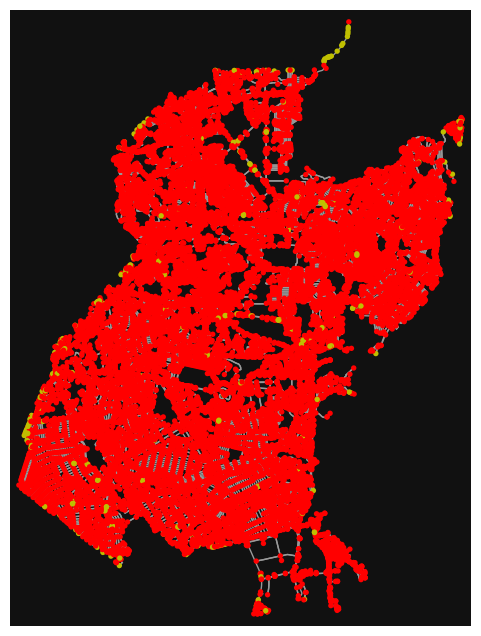

In [22]:
# turn off strict mode and see what nodes we'd remove, in yellow
nc = ["r" if ox.simplification._is_endpoint(H, node) else "y" for node in H.nodes()]
fig, ax = ox.plot_graph(H, node_color=nc)

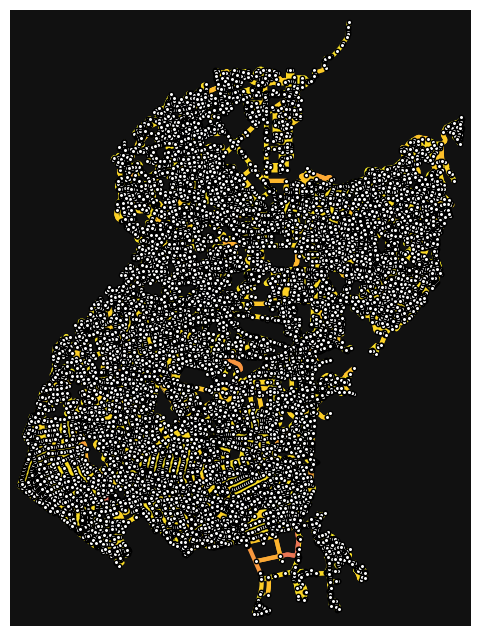

In [31]:
# show the simplified network with edges colored by length
ec = ox.plot.get_edge_colors_by_attr(H, attr="length", cmap="plasma_r")
fig, ax = ox.plot_graph(
    H, node_color="w", node_edgecolor="k", node_size=10, edge_color=ec, edge_linewidth=3
)

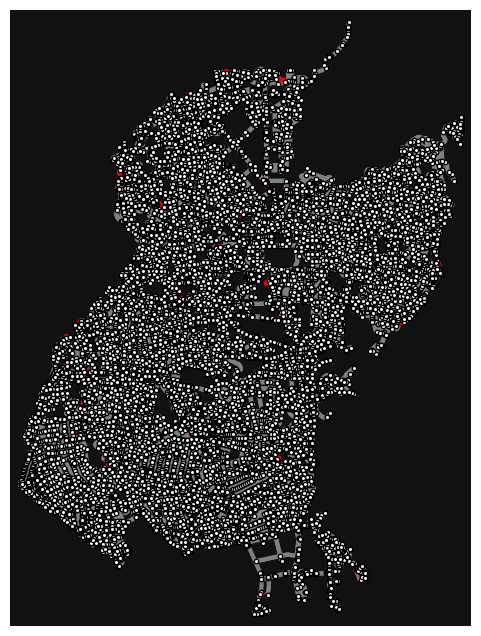

In [33]:
# highlight all parallel (multiple) edges
ec = ["gray" if k == 0 or u == v else "r" for u, v, k in H.edges(keys=True)]
fig, ax = ox.plot_graph(
    H, node_color="w", node_edgecolor="k", node_size=10, edge_color=ec, edge_linewidth=3
)

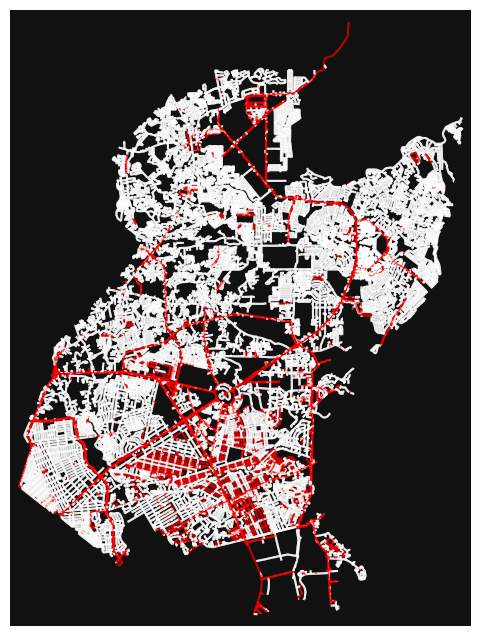

In [34]:
# highlight all one-way edges in the mission district network from earlier
ec = ["r" if data["oneway"] else "w" for u, v, key, data in H.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(H, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.7)

#### Test Run


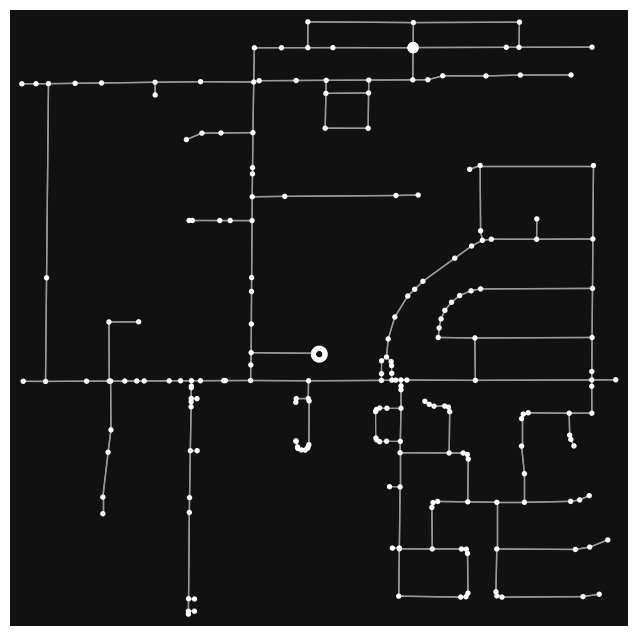

In [3]:
# create a network around some (lat, lng) point but do not simplify it yet
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, network_type="drive_service", dist=500, simplify=False)
fig, ax = ox.plot_graph(G)

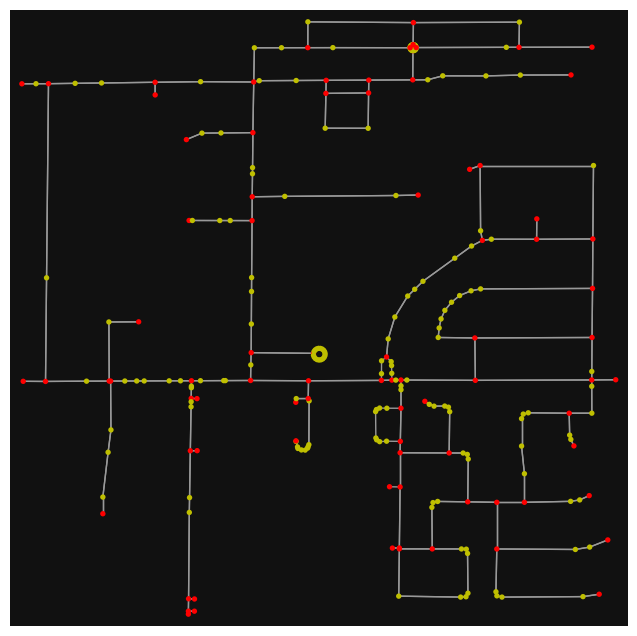

In [4]:
# turn off strict mode and see what nodes we'd remove, in yellow
nc = ["r" if ox.simplification._is_endpoint(G, node) else "y" for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc)

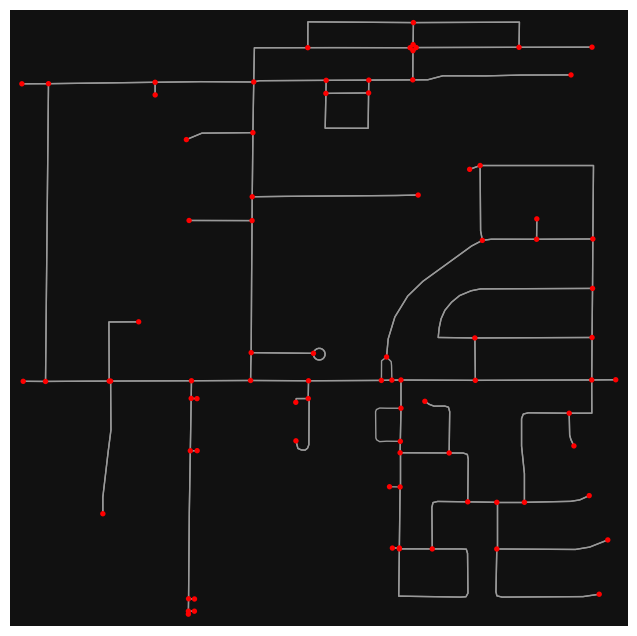

In [5]:
# simplify the network
G = ox.simplify_graph(G)
fig, ax = ox.plot_graph(G, node_color="r")

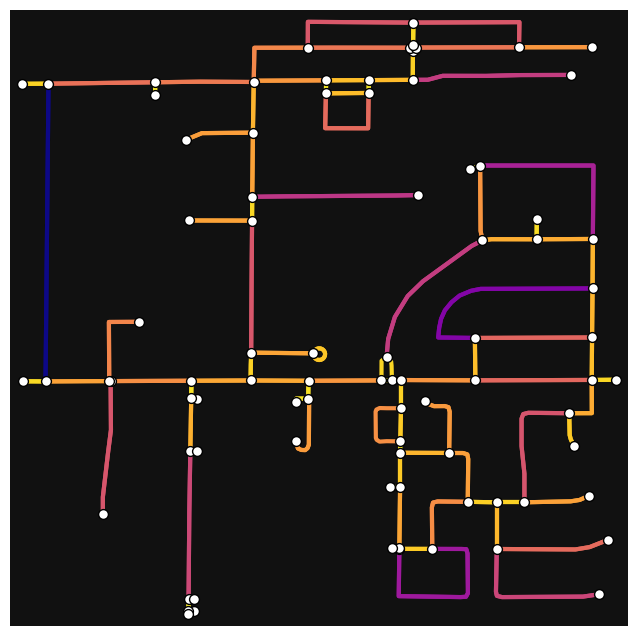

In [6]:
# show the simplified network with edges colored by length
ec = ox.plot.get_edge_colors_by_attr(G, attr="length", cmap="plasma_r")
fig, ax = ox.plot_graph(
    G, node_color="w", node_edgecolor="k", node_size=50, edge_color=ec, edge_linewidth=3
)

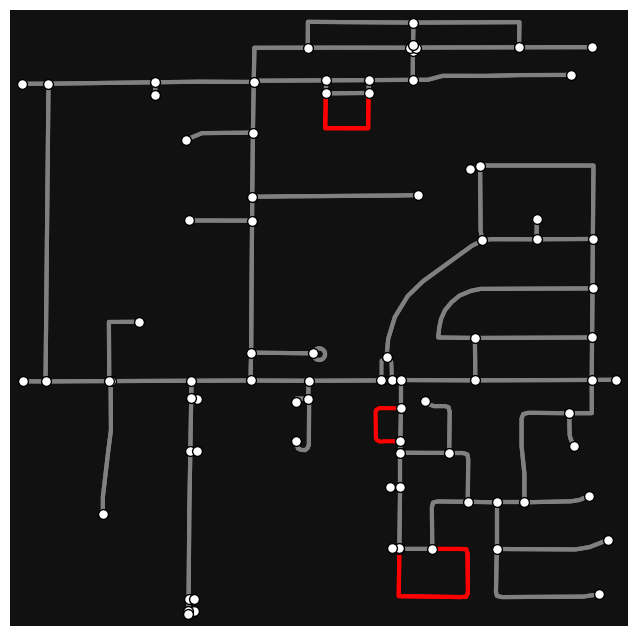

In [7]:
# highlight all parallel (multiple) edges
ec = ["gray" if k == 0 or u == v else "r" for u, v, k in G.edges(keys=True)]
fig, ax = ox.plot_graph(
    G, node_color="w", node_edgecolor="k", node_size=50, edge_color=ec, edge_linewidth=3
)

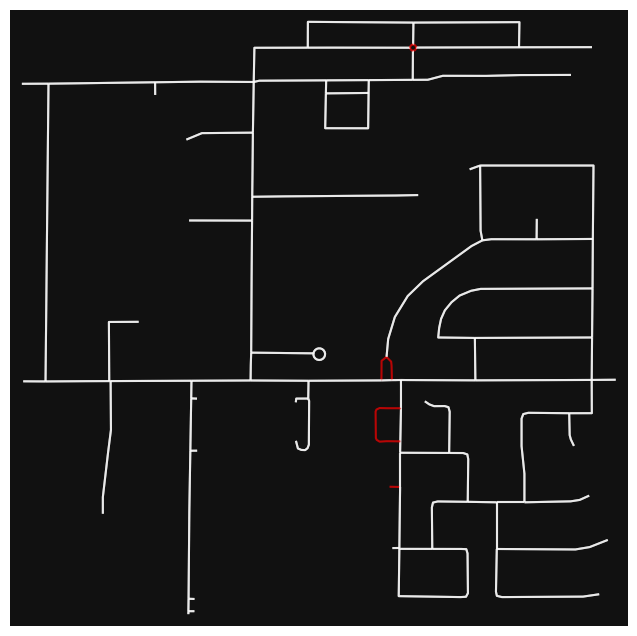

In [9]:
# highlight all one-way edges in the mission district network from earlier
ec = ["r" if data["oneway"] else "w" for u, v, key, data in G.edges(keys=True, data=True)]
fig, ax = ox.plot_graph(G, node_size=0, edge_color=ec, edge_linewidth=1.5, edge_alpha=0.7)

#### Test Run

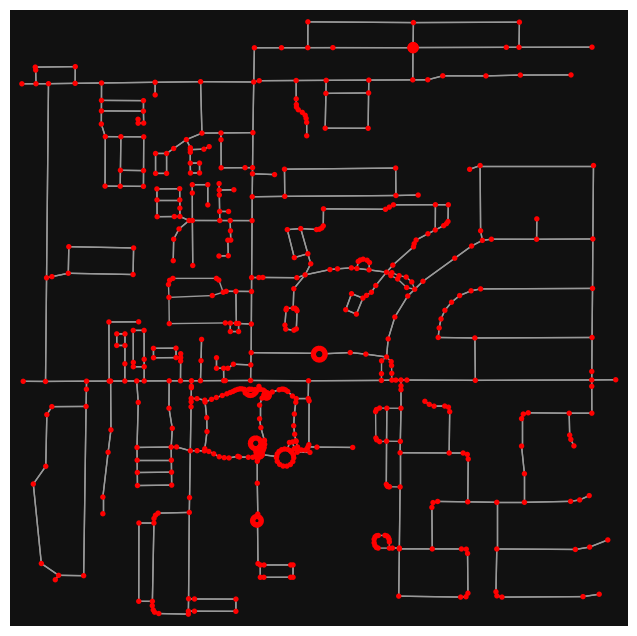

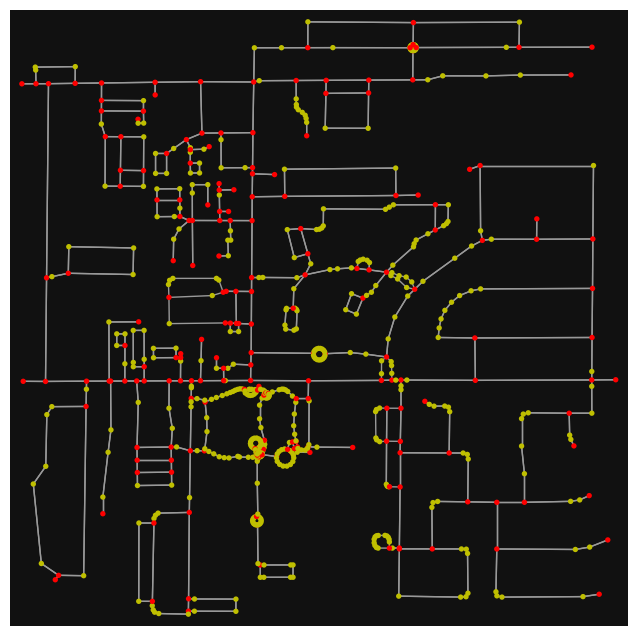

In [10]:
# create a network around some (lat, lng) point and plot it
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, dist=500, simplify=False)
fig, ax = ox.plot_graph(G, node_color="r")

# show which nodes we'd remove if we simplify it (yellow)
nc = ["r" if ox.simplification._is_endpoint(G, node) else "y" for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc)

# simplify the network
G2 = ox.simplify_graph(G)

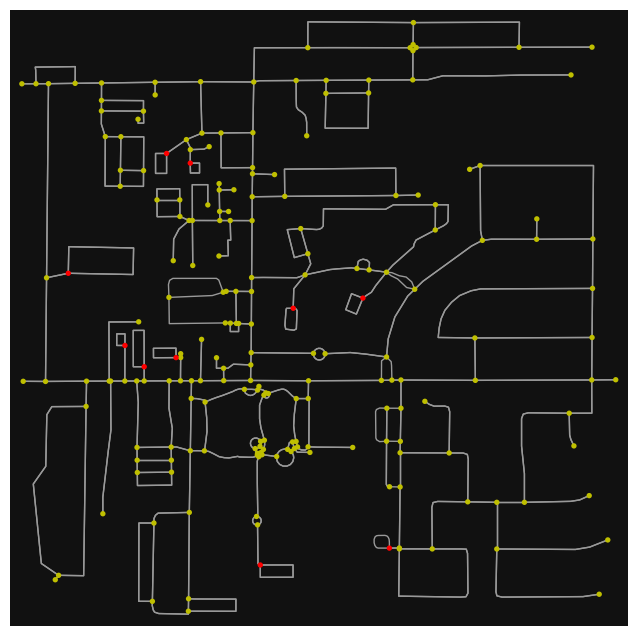

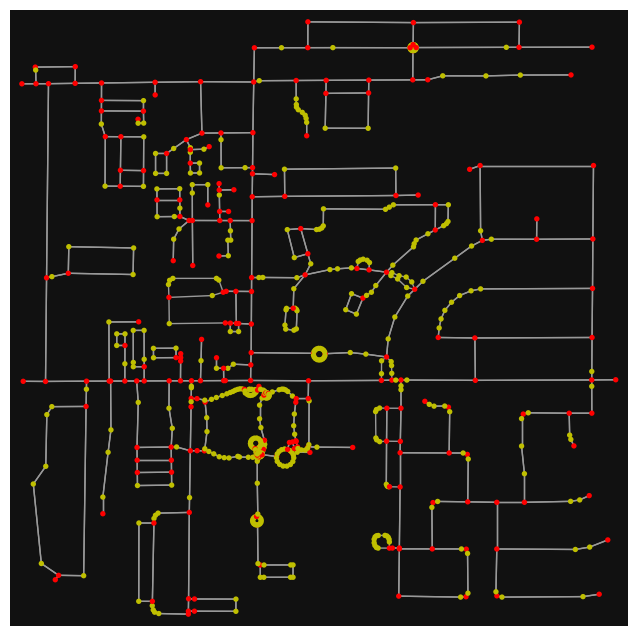

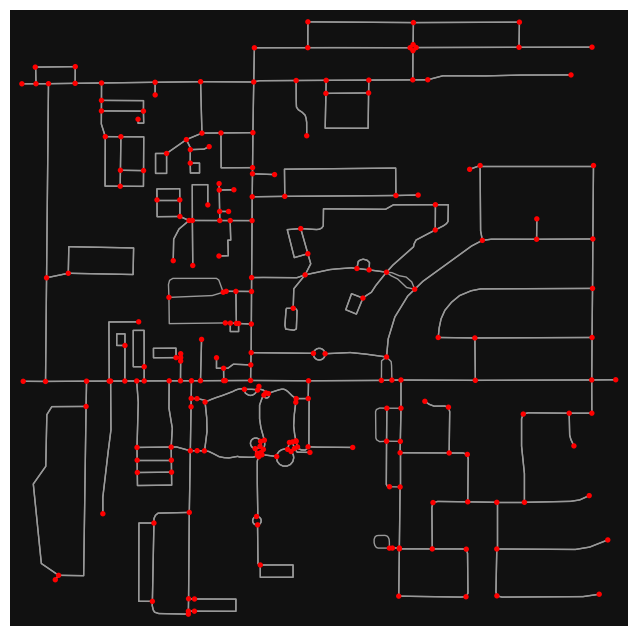

In [11]:
# plot the simplified network and highlight any self-loop edges
loops = [edge[0] for edge in nx.selfloop_edges(G2)]
nc = ["r" if node in loops else "y" for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, node_color=nc)

# turn off strict mode and see what nodes we'd remove
nc = ["r" if ox.simplification._is_endpoint(G, node, strict=False) else "y" for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc)

# simplify network with strict mode turned off
G3 = ox.simplify_graph(G.copy(), strict=False)
fig, ax = ox.plot_graph(G3, node_color="r")

#### Test Run

C:\Users\Sheena\anaconda3\envs\ox\Lib\site-packages\osmnx\graph.py:95: UserWarning: The clean_periphery argument has been deprecated and will be removed in a future release. Future behavior will be as though clean_periphery=True.
  G = graph_from_polygon(
C:\Users\Sheena\anaconda3\envs\ox\Lib\site-packages\osmnx\graph.py:95: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  G = graph_from_polygon(


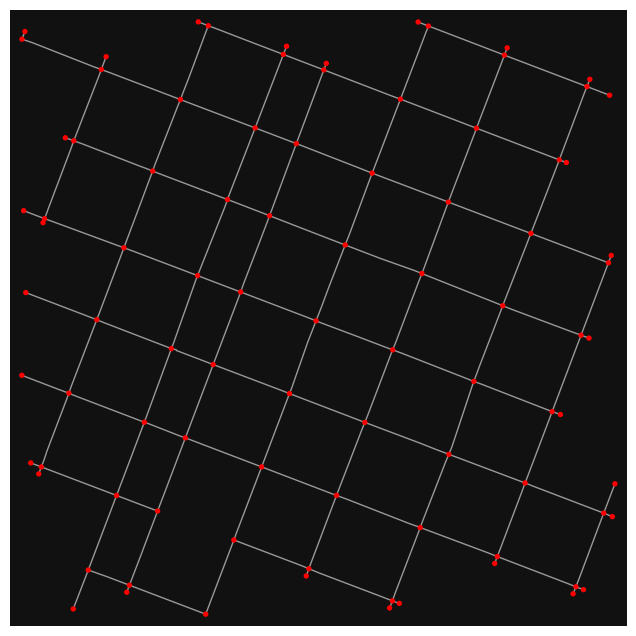

In [13]:
# get some bbox
bbox = ox.utils_geo.bbox_from_point((45.518698, -122.679964), dist=300)
north, south, east, west = bbox

G = ox.graph_from_bbox(north, south, east, west, network_type="drive", clean_periphery=False)
fig, ax = ox.plot_graph(G, node_color="r")

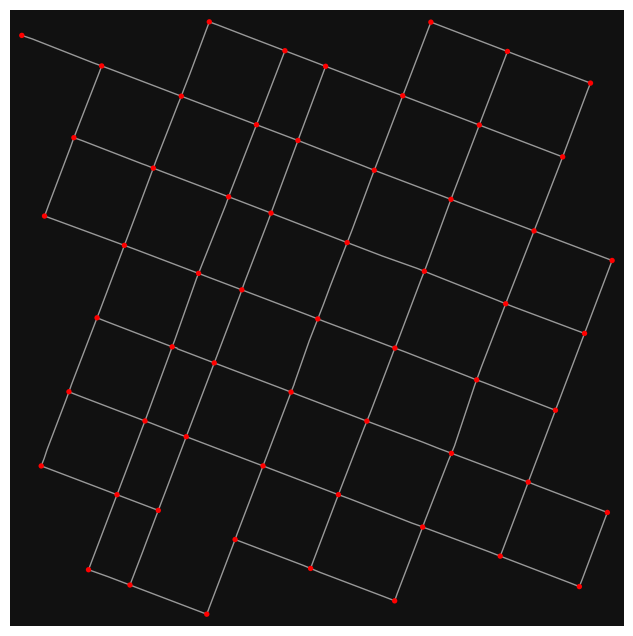

In [14]:
# the node degree distribution for this graph has many false cul-de-sacs
k = dict(G.degree())
{n: list(k.values()).count(n) for n in range(max(k.values()) + 1)}

G = ox.graph_from_bbox(north, south, east, west, network_type="drive")
fig, ax = ox.plot_graph(G, node_color="r")

In [15]:
# the streets per node distribution for this cleaned up graph is more accurate
# dict keys = count of streets emanating from the node (ie, intersections and dead-ends)
# dict vals = number of nodes with that count
k = nx.get_node_attributes(G, "street_count")
{n: list(k.values()).count(n) for n in range(max(k.values()) + 1)}

{0: 0, 1: 0, 2: 0, 3: 3, 4: 56}

#### Other Useful References:
1. The Ultimate Markdown Guide (for Jupyter Notebook) https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd
2. OSMnx: Python for Street Networks https://geoffboeing.com/2016/11/osmnx-python-street-networks/
3. OSMnx 1.8.0 documentation https://osmnx.readthedocs.io/en/stable/user-reference.html"